<a href="https://colab.research.google.com/github/nezihaksu/Airbnb_Istanbul/blob/main/airbnb_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.impute import SimpleImputer
import re

#Explatory Data Analysis

In [98]:
DF = r'/content/drive/MyDrive/listings.csv'
FILE_TYPE = "csv"
IMPUTE = True
ALLOWED_NAN_PERCENTAGE = 10
DROP_KEYWORDS = ["id","url","name","code","description","note","picture"]

class Eda():
  """Explore the dataset."""
  def __init__(self,df,file_type:str):
    if file_type == "xlsx" or  file_type == "xls":
      self.df = pd.read_excel(df,engine="python")
    self.df = pd.read_csv(df,engine="python")
    self.file_type = file_type

  def __call__(self):
    return self.df

  def intro(self):
    return "===INFO===",self.df.info(),"===DESCRIPTION===",self.df.describe(),"===DTYPES==",self.df.dtypes
  
  def unique_values(self):
    #Unique values that are in features.
    for column in self.df.columns:
      print(column.upper()+ " UNIQUE VALUES")
      print(str(df[column].unique())+"\n")

  def missing_values(self):
	  missing_percentage = self.df.isnull().sum()*100/len(self.df)
	  plt.figure(figsize=(5, 15))
	  missing_percentage.plot(kind='barh')
	  plt.xticks(rotation=90, fontsize=10)
	  plt.yticks(fontsize=5)
	  plt.xlabel("Missing Percentage", fontsize=14)
	  plt.show()
   
  #Plotting histograms of the numerical features to see the distribution of each of them.
  def dtype_histogram(self,data_type:str):
    numerical_features = self.df.dtypes[self.df.dtypes == data_type].index.to_list()
    self.df[numerical_features].hist(bins = 50,figsize = (20,15))
    plt.show()

In [99]:
eda = Eda(df=DF,file_type=FILE_TYPE)

In [100]:
class Preprocess():
  """Clean the dataset."""
  def __init__(self,df):
    self.df = df
 
  def drop_missing_columns(self,percentage):
    missing_percentage = self.df.isnull().sum()*100/len(self.df)
    features_left = missing_percentage[missing_percentage < percentage].index
    return self.df[features_left]

  def drop_column(self,keywords:list):
    for keyword in keywords:
      keyword_pattern = re.compile(keyword)
      for column in self.df.columns:
        if keyword_pattern.match(column):
          self.df.drop(column,axis=1,inplace=True)

In [95]:
df = eda()
preprocess = Preprocess(df)
preprocess.drop_missing_columns(ALLOWED_NAN_PERCENTAGE)

,id,listing_url,scrape_id,last_scraped,name,description,experiences_offered,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,4826,https://www.airbnb.com/rooms/4826,20190427155359,2019-04-28,The Place,My place is close to great views. My place is ...,none,https://a0.muscache.com/im/pictures/15347/ba87...,6603,https://www.airbnb.com/users/show/6603,Kaan,2009-01-14,"Istanbul, Istanbul, Turkey",f,https://a0.muscache.com/im/users/6603/profile_...,https://a0.muscache.com/im/users/6603/profile_...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Istanbul Province, Istanbul, Turkey",Uskudar,Istanbul Province,Istanbul,34684,Istanbul,"Istanbul Province, Turkey",TR,Turkey,41.05650,29.05367,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",$624.00,2,$154.00,1,730,1,1,730,730,1.0,730.0,24 months ago,t,30,60,90,365,2019-04-28,1,0,f,f,f,flexible,f,f,1,1,0,0
1,20815,https://www.airbnb.com/rooms/20815,20190427155359,2019-04-28,The Bosphorus from The Comfy Hill,Watch The Bosphorus from The Comfy Hill. A spa...,none,https://a0.muscache.com/im/pictures/94805791/4...,78838,https://www.airbnb.com/users/show/78838,Gülder,2010-02-08,"Ankara, Ankara, Turkey",f,https://a0.muscache.com/im/users/78838/profile...,https://a0.muscache.com/im/users/78838/profile...,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'wor...",t,f,"Istanbul, Turkey",Besiktas,Istanbul,NaN,34345,Istanbul,"Istanbul, Turkey",TR,Turkey,41.06984,29.04545,t,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",""Air conditioning"",Kitchen,""Fre...",$113.00,4,$208.00,30,210,30,30,210,210,30.0,210.0,3 months ago,t,0,0,0,117,2019-04-28,41,5,f,f,f,moderate,t,f,2,1,1,0
2,25436,https://www.airbnb.com/rooms/25436,20190427155359,2019-04-27,House for vacation rental furnutare,Evimiz Bebek Koru nun içinde . Şehrin içinde ...,none,https://a0.muscache.com/im/pictures/b64c3ef0-2...,105823,https://www.airbnb.com/users/show/105823,Yesim,2010-04-09,"Istanbul, Istanbul, Turkey",f,https://a0.muscache.com/im/users/105823/profil...,https://a0.muscache.com/im/users/105823/profil...,1.0,1.0,"['email', 'phone', 'offline_government_id', 's...",t,f,"Beşiktaş/ bebek, İstanbul, Turkey",Besiktas,Beşiktaş/ bebek,İstanbul,34400,Istanbul,"Beşiktaş/ bebek, Turkey",TR,Turkey,41.07731,29.03891,t,Serviced apartment,Entire home/apt,6,1.0,2.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$232.00,1,$0.00,21,1125,21,21,1125,1125,21.0,1125.0,2 weeks ago,t,0,0,0,2,2019-04-27,0,0,f,t,f,strict_14_with_grace_period,f,f,1,1,0,0
3,27271,https://www.airbnb.com/rooms/27271,20190427155359,2019-04-27,LOVELY APT. IN PERFECT LOCATION,This is a very nicely decorated apartment in a...,none,https://a0.muscache.com/im/pictures/2f9cfc85-8...,117026,https://www.airbnb.com/users/show/117026,Mutlu,2010-05-02,"Istanbul, Istanbul, Turkey",f,https://a0.muscache.com/im/users/117026/profil...,https://a0.muscache.

In [70]:
eda()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4826,https://www.airbnb.com/rooms/4826,20190427155359,2019-04-28,The Place,My place is close to great views. My place is ...,A double bed apartment on the Asian side of Is...,My place is close to great views. My place is ...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/15347/ba87...,NaN,6603,https://www.airbnb.com/users/show/6603,Kaan,2009-01-14,"Istanbul, Istanbul, Turkey","Hello...\r\nI am Kaan and I am from Istanbul, ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/6603/profile_...,https://a0.muscache.com/im/users/6603/profile_...,Üsküdar,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Istanbul Province, Istanbul, Turkey",Üsküdar,Uskudar,NaN,Istanbul Province,Istanbul,34684,Istanbul,"Istanbul Province, Turkey",TR,Turkey,41.05650,29.05367,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",700.0,$624.00,NaN,NaN,NaN,NaN,2,$154.00,1,730,1,1,730,730,1.0,730.0,24 months ago,t,30,60,90,365,2019-04-28,1,0,2009-06-01,2009-06-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,0.01
1,20815,https://www.airbnb.com/rooms/20815,20190427155359,2019-04-28,The Bosphorus from The Comfy Hill,Watch The Bosphorus from The Comfy Hill. A spa...,"The low green hills of Arnavutköy, the lovely,...",Watch The Bosphorus from The Comfy Hill. A spa...,none,"The lovely neighborhood, Arnavutkoy, is locate...",The house may be suited with extra inflatable ...,"The city center, Taksim is about 6-7 kilometer...",Our dear guests may enjoy the oven and the was...,"Depending on our time available, we may even t...",- Windows facing the street should not be left...,NaN,NaN,https://a0.muscache.com/im/pictures/94805791/4...,NaN,78838,https://www.airbnb.com/users/show/78838,Gülder,2010-02-08,"Ankara, Ankara, Turkey",Başar Family\r\n\r\nGülder (mother): Owner of ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/78838/profile...,https://a0.muscache.com/im/users/78838/profile...,Beşiktaş,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'wor...",t,f,"Istanbul, Turkey",Beşiktaş,Besiktas,NaN,Istanbul,NaN,34345,Istanbul,"Istanbul, Turkey",TR,Turkey,41.06984,29.04545,t,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",""Air conditioning"",

In [71]:
eda.intro()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17328 entries, 0 to 17327
Columns: 106 entries, id to reviews_per_month
dtypes: float64(25), int64(21), object(60)
memory usage: 14.0+ MB


('===INFO===',
 None,
 '===DESCRIPTION===',
                  id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
 count  1.732800e+04  1.732800e+04            0.0         0.0             0.0   
 mean   2.052274e+07  2.019043e+13            NaN         NaN             NaN   
 std    1.105506e+07  4.660291e+00            NaN         NaN             NaN   
 min    4.826000e+03  2.019043e+13            NaN         NaN             NaN   
 25%    9.745796e+06  2.019043e+13            NaN         NaN             NaN   
 50%    2.387198e+07  2.019043e+13            NaN         NaN             NaN   
 75%    3.042305e+07  2.019043e+13            NaN         NaN             NaN   
 max    3.422060e+07  2.019043e+13            NaN         NaN             NaN   
 
             host_id  host_acceptance_rate  host_listings_count  \
 count  1.732800e+04                   0.0         17301.000000   
 mean   9.832623e+07                   NaN             4.741460   
 std    8.740385e+07    

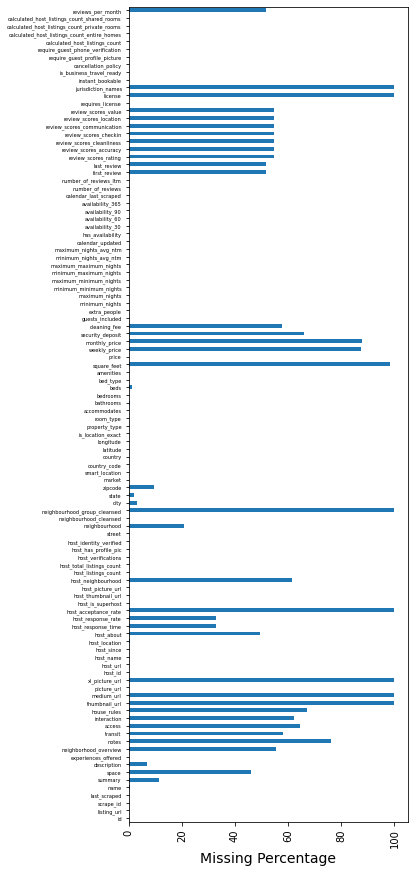

In [72]:
eda.missing_values()

In [73]:
eda.unique_values()

ID UNIQUE VALUES
['4826' '20815' '25436' ... '34219189' '34219411' '34220597']

LISTING_URL UNIQUE VALUES
['https://www.airbnb.com/rooms/4826' 'https://www.airbnb.com/rooms/20815'
 'https://www.airbnb.com/rooms/25436' ...
 'https://www.airbnb.com/rooms/34219189'
 'https://www.airbnb.com/rooms/34219411'
 'https://www.airbnb.com/rooms/34220597']

SCRAPE_ID UNIQUE VALUES
['20190427155359']

LAST_SCRAPED UNIQUE VALUES
['2019-04-28' '2019-04-27']

NAME UNIQUE VALUES
['The Place' 'The Bosphorus from The Comfy Hill'
 'House for vacation rental furnutare' ... 'Cozy home near to Cevahir'
 'Private room in the heart of the city' 'Deluxe Double Room']

SUMMARY UNIQUE VALUES
['My place is close to great views. My place is good for couples and business travelers.'
 'Watch The Bosphorus from The Comfy Hill. A spacious and relaxing place with a wide view of the Bosphorus, two rooms, an open kitchen, and a single rule to feel home.'
 'Evimiz Bebek Koru nun içinde . Şehrin  içinde köy hayatı isterseniz

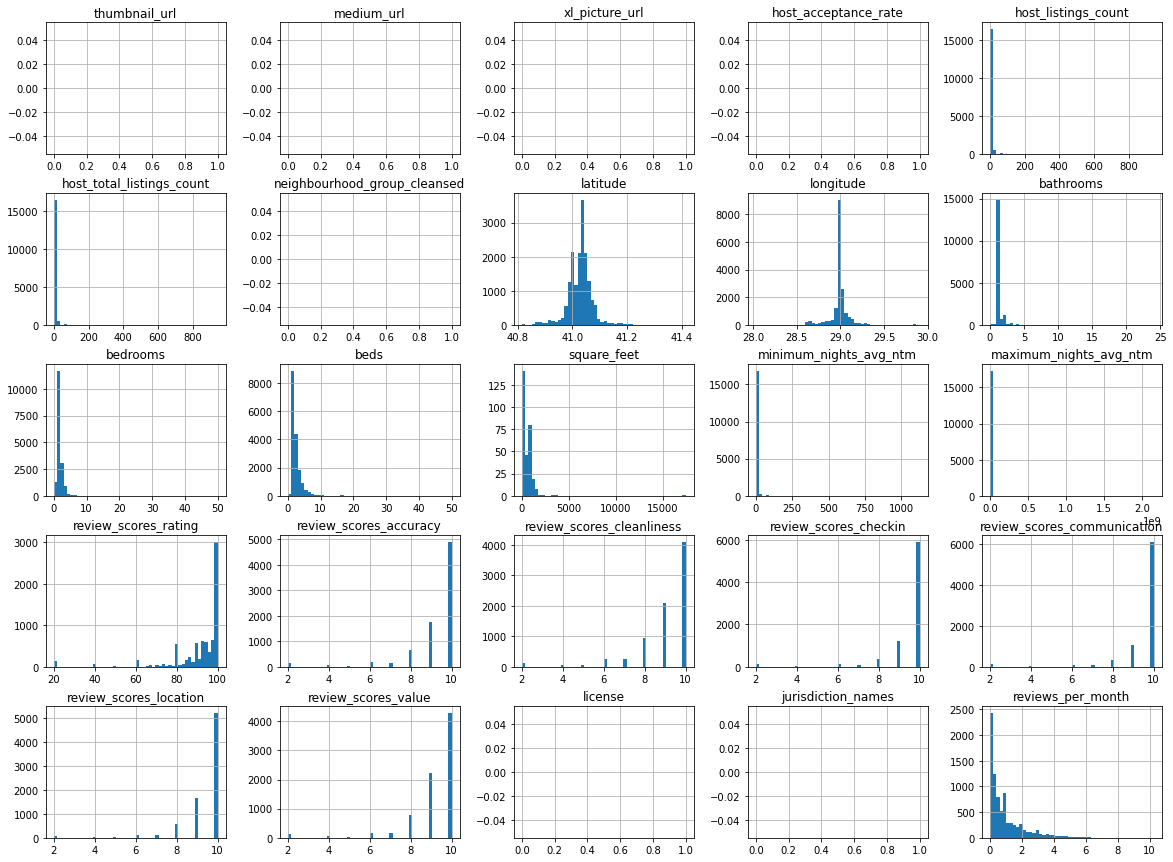

In [80]:
eda.dtype_histogram("float64")

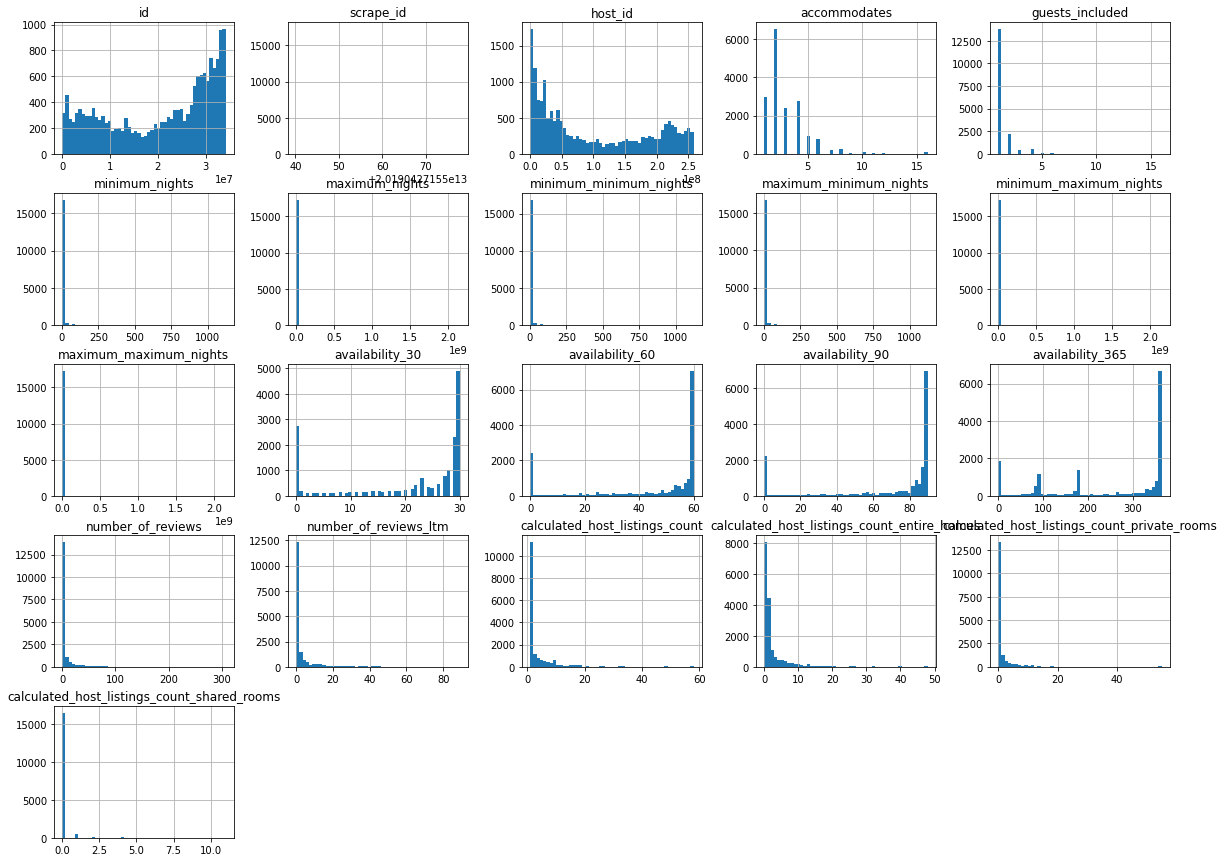

In [81]:
eda.dtype_histogram("int64")